# Loan default prediction and model assessment

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
#!pip install jupyterthemes
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme = 'monokai', context= 'notebook', ticks= True, grid= False)

In [2]:
default_data = pd.read_csv('Loan_default.csv')

# Preprocessing

In [3]:
np.sum(default_data.isnull())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [4]:
default_data.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
obj_col = ['HasCoSigner','LoanPurpose','HasDependents', 'HasMortgage','MaritalStatus', 'EmploymentType', 'Education']
for col in obj_col:
    default_data[col] = le.fit_transform(default_data[col])
    from sklearn.preprocessing import LabelEncoder 

default_data = default_data.drop(['LoanID'], axis=1)


In [48]:
default_data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


<Axes: >

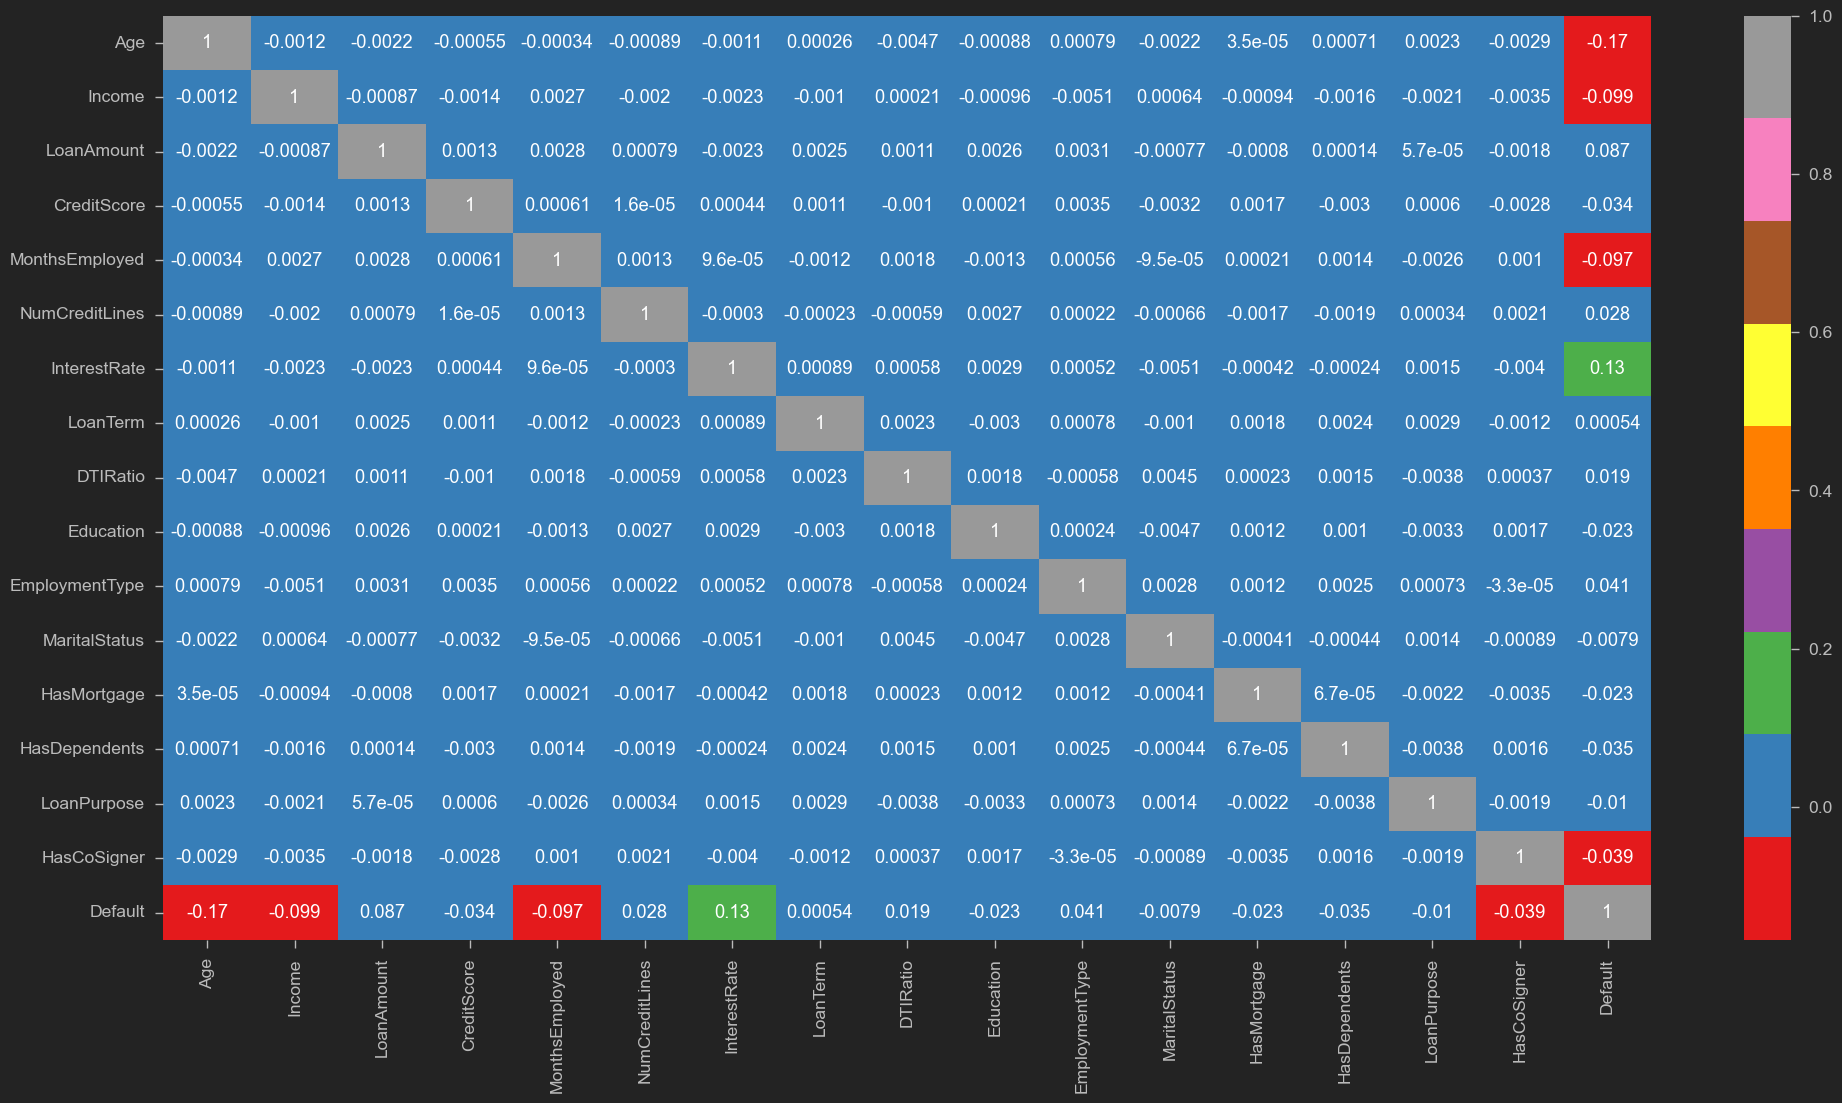

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))
corr2 = default_data.corr()
sns.heatmap(corr2, annot=True, cmap='Set1')

In [51]:
X = default_data.drop(['Default'], axis=1)
y = default_data['Default']

In [52]:
#!pip install xgboost
#!pip install catboost

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


models = [
    CatBoostClassifier(verbose=False),
    XGBClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    #KNeighborsClassifier(),
    GaussianNB()
    
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    model_name = model.__class__.__name__
    print(f'{model_name} - Precisión: {score:.2f}')

CatBoostClassifier - Precisión: 0.89
XGBClassifier - Precisión: 0.89
RandomForestClassifier - Precisión: 0.89
LogisticRegression - Precisión: 0.88
GaussianNB - Precisión: 0.88
